In [1]:
from os import listdir
import pandas as pd
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Sbermarket/test-recsys.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [ ]:
folders = ['sbermarket_tab_2_1','sbermarket_tab_2_2','sbermarket_tab_2_3',
          'sbermarket_tab_2_4','sbermarket_tab_2_5','sbermarket_tab_2_6']

In [ ]:
t1 = pd.read_csv('kaggle_tab_1345/tab_1_orders.csv')[['order_id', 'order_created_time']]

In [ ]:
itogos = []
for folder in tqdm(folders):
    itogo = pd.DataFrame()
    files = listdir(folder)
    for file in tqdm(files):
        tmp = pd.read_csv(folder+'/'+file)
        itogo = itogo.append(tmp)
    itogo = pd.merge(itogo, t1, how = 'left', on = 'order_id')
    tmp = itogo.dropna()

100%|██████████| 6/6 [05:35<00:00, 55.99s/it]


tmp1 = pd.read_csv('sbermarket_tab_2_1/tab_2_products_2020-01-01.csv')
tmp = pd.read_csv('sbermarket_tab_2_1/tab_2_products_2020-01-01.csv')

In [3]:
submission_sample = pd.read_csv('/content/drive/My Drive/Sbermarket/sample_submission.csv')

In [ ]:
#tmp = pd.read_csv('/content/sbermarket_tab_2_1/tab_2_products_2020-01-01.csv')

In [ ]:
tmp1 = tmp[tmp['user_id'].isin(submission_sample['Id'].apply(int).values.tolist())][:10000]

In [ ]:
tmp1 = tmp.copy()

In [ ]:
df = pd.read_csv('kaggle_tab_1345'+'/'+'tab_1_orders.csv')
df1 = pd.read_csv('kaggle_tab_1345'+'/'+'tab_1_orders.csv')
df.set_index(['user_id', 'retailer'], inplace = True)
gp_ret = pd.DataFrame(df1.groupby('user_id').retailer.value_counts()/df1.groupby('user_id').retailer.count())
df = df.join(gp_ret).rename(columns={'retailer': 'retailer_proba'}).reset_index()
df.set_index(['user_id', 'order_id'], inplace = True)

In [ ]:
df.drop(['order_created_time', 'store_id','platform'], inplace=True, axis=1)

In [ ]:
tmp.reset_index(inplace=True)

In [82]:
tmp.reset_index(inplace=True)
tmp.set_index(['user_id', 'order_id'], inplace=True)

In [84]:
tmp.drop(['level_0', 'Unnamed: 0', 'index'], axis=1, inplace=True)

In [86]:
df.reset_index(inplace=True)

In [ ]:
ind_to_drop = []
for x in tqdm(df.iloc):
    if x['user_id'] not in tmp.index:
        ind_to_drop.append(x['user_id'])

1818079it [1:58:12, 264.92it/s]

In [ ]:
df.set_index('user_id', inplace=True)
df.drop(ind_to_drop, inplace=True)

In [87]:
df.set_index(['user_id', 'order_id'], inplace=True)

In [89]:
df.drop(['index'], axis=1, inplace=True)

In [ ]:
df.to_csv('df_before_merge.csv')
tmp.to_csv('tmp_before_merge.csv')

In [4]:
df = pd.read_csv('/content/drive/My Drive/Sbermarket/df_before_merge.csv')
tmp = pd.read_csv('/content/drive/My Drive/Sbermarket/tmp_before_merge.csv')

In [163]:
user_info = pd.read_csv('/content/drive/My Drive/Sbermarket/tab_4_user_profiles.csv')

In [164]:
user_info.dropna(inplace=True)

In [165]:
user_info['bdate'].value_counts().sort_index()

01.01.1900    1
01.01.1910    3
01.01.1917    1
01.01.1919    1
01.01.1935    1
             ..
9.9.1997      2
9.9.1998      2
9.9.1999      3
9.9.2002      2
9.9.2006      1
Name: bdate, Length: 27463, dtype: int64

In [166]:
user_info['bdate'] = user_info['bdate'].apply(pd.to_datetime, format='%d.%m.%Y', errors='ignore')
user_info['bdate'] = user_info['bdate'].apply(pd.to_datetime, errors='ignore')
user_info.dropna(inplace=True)

user_info['bdate']

1         1987-10-11 00:00:00
10        1982-09-24 00:00:00
19        1983-09-26 00:00:00
22        1989-03-16 00:00:00
41        1978-12-04 00:00:00
                 ...         
438862    1997-09-15 00:00:00
438863    1978-09-18 00:00:00
438864    1981-11-02 00:00:00
438865    1993-10-04 00:00:00
438866    1981-07-22 00:00:00
Name: bdate, Length: 206928, dtype: object

In [45]:
user_info.dtypes

gender    object
bdate     object
dtype: object

In [167]:
user_info.drop_duplicates(inplace=True)

In [ ]:
tmp.describe()

In [12]:
user_info.set_index('user_id', inplace=True)

In [13]:
tmp = tmp.reset_index().set_index('user_id')

In [ ]:
user_info.reset_index(inplace=True)

In [168]:
user_info['bdate'] = user_info['bdate'].apply(str)

In [169]:
user_info['bdate'] = user_info['bdate'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [170]:
user_info.dropna(inplace=True)

In [171]:
user_info['age_category'] = user_info['bdate'].apply(lambda x: int((datetime.now() - x).days / 365)).apply(age_category)
user_info

,user_id,gender,bdate,age_category
1,1683001,male,1987-10-11,3
10,1288925,male,1982-09-24,3
19,1914497,male,1983-09-26,3
22,631583,male,1989-03-16,3
41,2106256,male,1978-12-04,4
...,...,...,...,...
438862,3424212,female,1997-09-15,2
438863,3424222,male,1978-09-18,4
438864,3424225,female,1981-11-02,3
438865,3424228,female,1993-10-04,2


In [172]:
user_info.drop(['gender','bdate'], axis=1, inplace=True)

In [173]:
user_info.set_index('user_id',inplace=True)

In [174]:
user_info['add'] = [cat.loc[x['age_category']]['product_id'] for x in user_info.iloc()]

In [175]:
user_info.drop('age_category', inplace=True, axis=1)

In [176]:
user_info.reset_index(inplace=True)

In [177]:
user_info.rename(columns={'user_id': 'Id'}, inplace=True)

In [178]:
tt = pd.DataFrame(user_info.Id.value_counts())
len(tt[tt['Id'] == 2].index.tolist())

19

In [179]:
dob = user_info[user_info['Id'].isin(tt[tt['Id'] == 2].index.tolist())].sort_values('Id')[::2]

In [182]:
dob

,Id,add
3786,214446,709 1300 39590 158 67694 55134 166 63072 100 3...
192665,1044049,709 39590 158 166 100 14564 180 67694 73725 13...
13544,1625638,709 158 39590 166 1300 67694 100 3817484 63072...
1753,1988600,709 39590 158 166 100 14564 180 67694 73725 13...
8506,2003146,709 158 39590 166 1300 67694 100 3817484 63072...
17983,2087455,709 1300 39590 158 67694 55134 166 63072 100 3...
293,2108759,709 39590 158 166 100 14564 180 67694 73725 13...
10477,2196801,709 1300 39590 158 67694 55134 166 63072 100 3...
8727,2234169,709 39590 166 180 158 55133 100 3497419 73725 ...
4575,2311078,709 166 39590 180 67040 70763 101251 5154 2175...


In [180]:
user_info = user_info.set_index('Id').drop(tt[tt['Id'] == 2].index.tolist()).reset_index()

In [181]:
user_info

,Id,add
0,1683001,709 39590 158 166 100 14564 180 67694 73725 13...
1,1288925,709 39590 158 166 100 14564 180 67694 73725 13...
2,1914497,709 39590 158 166 100 14564 180 67694 73725 13...
3,631583,709 39590 158 166 100 14564 180 67694 73725 13...
4,2106256,709 158 39590 166 1300 67694 100 3817484 63072...
...,...,...
206504,3424212,709 39590 166 180 158 55133 100 3497419 73725 ...
206505,3424222,709 158 39590 166 1300 67694 100 3817484 63072...
206506,3424225,709 39590 158 166 100 14564 180 67694 73725 13...
206507,3424228,709 39590 166 180 158 55133 100 3497419 73725 ...


In [183]:
user_info = pd.concat([user_info, dob])

In [184]:
user_info

,Id,add
0,1683001,709 39590 158 166 100 14564 180 67694 73725 13...
1,1288925,709 39590 158 166 100 14564 180 67694 73725 13...
2,1914497,709 39590 158 166 100 14564 180 67694 73725 13...
3,631583,709 39590 158 166 100 14564 180 67694 73725 13...
4,2106256,709 158 39590 166 1300 67694 100 3817484 63072...
...,...,...
16059,2530085,709 166 39590 180 67040 70763 101251 5154 2175...
12938,2617286,709 158 39590 166 1300 67694 100 3817484 63072...
61467,2630483,709 39590 166 180 158 55133 100 3497419 73725 ...
18352,2915969,709 39590 158 166 100 14564 180 67694 73725 13...


In [15]:
tmp_merged_1 = tmp.join(user_info)

In [159]:
user_info

,add,Id
1683001,709 39590 158 166 100 14564 180 67694 73725 13...,NaN
1288925,709 39590 158 166 100 14564 180 67694 73725 13...,NaN
1914497,709 39590 158 166 100 14564 180 67694 73725 13...,NaN
631583,709 39590 158 166 100 14564 180 67694 73725 13...,NaN
2106256,709 158 39590 166 1300 67694 100 3817484 63072...,NaN
...,...,...
16059,709 166 39590 180 67040 70763 101251 5154 2175...,2530085.0
12938,709 158 39590 166 1300 67694 100 3817484 63072...,2617286.0
61467,709 39590 166 180 158 55133 100 3497419 73725 ...,2630483.0
18352,709 39590 158 166 100 14564 180 67694 73725 13...,2915969.0


In [11]:
tmp.order_created_time.value_counts().sort_index()

2020-01-01 10:20:46    26
2020-01-01 11:25:45    12
2020-01-01 13:00:32    28
2020-01-01 14:53:12     7
2020-01-02 05:39:56    21
                       ..
2020-09-16 21:19:44    21
2020-09-16 21:51:24     4
2020-09-16 22:10:57     9
2020-09-16 22:30:31    26
2020-09-16 22:57:36    10
Name: order_created_time, Length: 224646, dtype: int64

In [16]:
tmp_merged_1.dropna(inplace=True)

In [17]:
tmp_merged_1

,level_0,Unnamed: 0,index,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id,order_created_time,gender,bdate
user_id,,,,,,,,,,,,,,,,
3011,1572641,3256610,3256610,13624785,165259777,24.900000,3,0.000000,Печенье Юбилейное Традиционное витаминизированное,21904,Юбилейное,600.0,56,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,1572643,3256612,3256612,13624785,165260456,67.989998,1,0.000000,Печенье Любятово Постное затяжное 300 г,38105,Любятово,600.0,56,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,1572644,3256613,3256613,13624785,165262611,75.989998,2,0.000000,Крекер Tuc мини со вкусом сметаны и лука 100 г,5074244,Tuc,600.0,56,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,1572645,3256614,3256614,13624785,165263313,91.989998,3,0.000000,Чипсы Lay's Молодой зеленый лук 150 г,1590,Lay's,610.0,19,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,1572646,3256615,3256615,13624785,165263758,147.990005,1,0.000000,Чипсы Lay's Молодой зеленый лук 240 г,101253,Lay's,610.0,19,2020-07-18 13:19:52,male,1972-10-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142509,1572113,3254694,3254694,16828798,173246318,154.990005,1,165.000000,Дамплинги Bibigo Мини 370 г,5629995,Bibigo,643.0,99,2020-09-16 20:10:59,male,1997-08-02 00:00:00
3142509,1572114,3254695,3254695,16828798,173247081,89.889999,1,49.799999,Напиток сокосодержащий Любимый апельсин-манго ...,58083,Любимый,630.0,74,2020-09-16 20:10:59,male,1997-08-02 00:00:00
3142509,1572115,3254696,3254696,16828798,173354767,73.690002,1,0.000000,Чипсы Doritos Taco кукурузные Пряная паприка 1...,6694773,Doritos,610.0,19,2020-09-16 20:10:59,male,1997-08-02 00:00:00


In [18]:
tmp_merged_1 = tmp_merged_1.drop(['order_id','line_item_id','quantity','discount',
                                  'product_name','brand_name', 'parent_category_id','master_category_id','price','index','level_0','Unnamed: 0'], axis=1)
tmp_merged_1.drop_duplicates(inplace=True)

In [19]:
tmp_merged_1

,product_id,order_created_time,gender,bdate
user_id,,,,
3011,21904,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,38105,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,5074244,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,1590,2020-07-18 13:19:52,male,1972-10-06 00:00:00
3011,101253,2020-07-18 13:19:52,male,1972-10-06 00:00:00
...,...,...,...,...
3142509,5629995,2020-09-16 20:10:59,male,1997-08-02 00:00:00
3142509,58083,2020-09-16 20:10:59,male,1997-08-02 00:00:00
3142509,6694773,2020-09-16 20:10:59,male,1997-08-02 00:00:00


In [20]:
tmp_merged_1['order_created_time'] = tmp_merged_1['order_created_time'].apply(pd.to_datetime)

In [ ]:
str(tmp_merged_1['bdate'].iloc[0])

'1972-10-06 00:00:00'

In [21]:
tmp_merged_1['bdate'] = tmp_merged_1['bdate'].apply(str)

In [22]:
tmp_merged_1['bdate'] = tmp_merged_1['bdate'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
tmp_merged_1.dtypes

product_id                     int64
order_created_time    datetime64[ns]
gender                        object
bdate                 datetime64[ns]
dtype: object

In [ ]:
(tmp_merged_1['bdate'].iloc[0] -  tmp_merged_1['order_created_time'].iloc[0]).days / 365

-47.81643835616438

In [23]:
tmp_merged_1.dropna(inplace=True)

In [24]:
tmp_merged_1['age'] = tmp_merged_1[['order_created_time','bdate']].apply(lambda x: int((x[0] - x[1]).days / 365), axis=1)

In [25]:
tmp_merged_1 = tmp_merged_1[(tmp_merged_1['age'] > 6) & (tmp_merged_1['age'] < 81)]

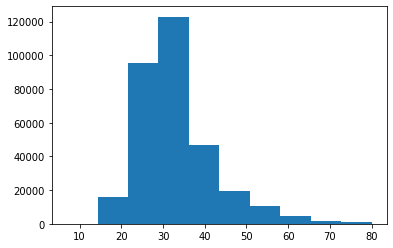

In [26]:
import matplotlib.pyplot as plt
plt.hist(tmp_merged_1['age']);

In [27]:
def age_category(x):
  if x < 20:
    return 1
  if x >= 20 and x < 30:
    return 2
  if x >= 30 and x < 40:
    return 3
  if x >=40  and x < 50:
    return 4
  if x >=50:
    return 5

In [28]:
tmp_merged_1['age_category'] = tmp_merged_1.age.apply(age_category)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
tmp_merged_1.reset_index(inplace=True)

In [30]:
tmp_merged_1.drop(['bdate','order_created_time','gender','user_id'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
top_cat = pd.DataFrame(tmp_merged_1.groupby(['age_category']).product_id.value_counts()/tmp_merged_1.groupby(['age_category']).product_id.count()).rename(columns={'product_id': 'product_proba'}).reset_index()
top = top_cat.groupby(['age_category'])[['product_proba', 'product_id']].apply(pd.DataFrame.nlargest, n=50, columns=['product_proba']).reset_index()

In [32]:
top.drop('level_1', axis=1, inplace=True)

In [33]:
top['product_id'] = top['product_id'].apply(lambda x: str(x) + ' ')

In [34]:
cat = pd.DataFrame(top.groupby('age_category')['product_id'].sum())

In [68]:
cat

,age_category
product_id,
709 166 39590 180 67040 70763 101251 5154 21757 66893 66966 73725 170 1598 2271 5217 23499 24831 72003 6782783 7325382 11 1597 2322 2325 9979 21767 51415 55133 57621 4033462 6685882 6694772 100 158 2544 6347 7397 9496 17145 21904 26335 26342 26597 31277 39589 39770 48315 57199 66894,1
709 39590 166 180 158 55133 100 3497419 73725 14564 66893 176 5217 67694 4033462 5469728 1300 7325382 21757 6685882 4592908 36067 3817484 21904 68465 57291 5479511 72003 57292 7397 49911 77094 73492 2544 72011 170 6782754 1746 77405 100849 70763 57621 72875 5154 63072 71049 55134 57290 21767 2600083,2
709 39590 158 166 100 14564 180 67694 73725 1300 7397 21904 7325382 3497419 49911 6685882 3817484 63072 176 72875 55133 21757 70763 7401 72011 77405 17314 5469728 981 31277 24836 96306 170 6782754 10049 36067 39589 24831 57291 100849 72003 52657 1746 68465 24835 5469736 7000939 71049 67040 10016,3
709 158 39590 166 1300 67694 100 3817484 63072 21904 176 7397 10049 55133 14564 981 5469728 7401 96306 21757 45459 3302524 5476137 49911 72006 52657 73725 100849 3497419 180 1746 15593 67199 31277 1747 3817489 68465 72011 6782754 2271 55134 5217 24831 72003 3497505 6685882 7000939 1242 21767 49921,4
709 1300 39590 158 67694 55134 166 63072 100 3817484 5469728 176 55133 69669 3497463 49911 6685882 7397 68465 24831 5469736 182 222 981 21757 73725 78643 180 20276 52657 3817512 6005364 6805305 45457 100849 5479511 6782788 104 14564 18398 5047346 39591 60615 3497505 3497570 6782754 6782783 7048452 9867 66966,5


In [36]:
cat['product_id'] = cat['product_id'].apply(lambda x: x[:-1])
cat.reset_index(inplace=True)

In [69]:
cat.reset_index(inplace=True)

In [70]:
cat.set_index('age_category', inplace=True)

In [ ]:
sub2.reset_index(inplace=True)

In [ ]:
df.drop('index', inplace=True, axis=1)

In [90]:
tmp_merged = tmp.join(df)
tmp1 = tmp_merged.copy().reset_index()

In [ ]:
tmp1.user_id.value_counts()

1082977    2708
1225384    2161
1637889    2147
938731     1925
222648     1902
           ... 
1077791       1
2952150       1
2968543       1
1894863       1
2804926       1
Name: user_id, Length: 86119, dtype: int64

In [91]:
random_retailer_select_proba = 1 / len(set(df['retailer'].values))
random_retailer_select_proba

0.01639344262295082

In [92]:
import random
import numpy as np

In [93]:
tmp1.retailer_proba.fillna(value=random_retailer_select_proba, inplace=True)

In [94]:
tmp1['retailer'] = tmp1.retailer.apply(lambda x: random.choice(df['retailer'].values) if type(x) == float else x)

In [95]:
tmp2 = tmp1.drop(['order_id','line_item_id','quantity','discount','product_name','brand_name', 'parent_category_id','order_created_time','price'], axis=1)
tmp2.drop_duplicates(inplace=True)

In [96]:
tmp_3_index = tmp2.set_index(['user_id', 'retailer','master_category_id'])

In [97]:
gp = pd.DataFrame(tmp2.groupby(['user_id','retailer']).master_category_id.value_counts()/tmp2.groupby(['user_id','retailer']).master_category_id.count())
data = tmp_3_index.join(gp).rename(columns={'master_category_id': 'master_category_proba'}).reset_index()

In [98]:
tmp_4_index = data.set_index(['user_id', 'retailer','master_category_id','product_id'])

In [99]:
tmp_cond = pd.DataFrame(data.groupby(['user_id', 'retailer','master_category_id']).product_id.value_counts()/data.groupby(['user_id', 'retailer','master_category_id']).product_id.count())
data = tmp_4_index.join(tmp_cond).rename(columns={'product_id': 'cond_product_proba'}).reset_index()

In [100]:
data["probas"] = data['retailer_proba'] * data['master_category_proba'] * data['cond_product_proba']

In [101]:
data[(data['user_id'] == 525) & (data['product_id'] == 37548)]

,user_id,retailer,master_category_id,product_id,retailer_proba,master_category_proba,cond_product_proba,probas


In [102]:
prediction2 = data.groupby(['user_id'])[['probas', 'product_id']].apply(pd.DataFrame.nlargest, n=50, columns=['probas']).reset_index()

In [ ]:
prediction2['user_id'].value_counts()

186277     50
2999842    50
1104256    50
1788146    50
1687715    50
           ..
3121918     1
1425872     1
81956       1
231667      1
121842      1
Name: user_id, Length: 86095, dtype: int64

In [103]:
prediction2['product_id'] = prediction2['product_id'].apply(lambda x: str(x)+' ')

In [211]:
sub2 = pd.DataFrame(prediction2.groupby('user_id')['product_id'].sum())

In [212]:
sub2['product_id'] = sub2['product_id'].apply(lambda x: x[:-1])

In [213]:
sub2.reset_index(inplace=True)

In [214]:
sub2 = sub2.rename(columns={'user_id': 'Id', 'product_id' : 'Predicted'})

In [215]:
merged1 = pd.merge(sub2,submission_sample['Id'],on = 'Id',how='right')

In [216]:
merged1

,Id,Predicted
0,51,NaN
1,65,38362 4141822 74516 17111 709 103831 3302524 5...
2,766,5483405 7008786 7062000 7062001 45159 57199 54...
3,1132,1197 95465 61082 5997193 5657394 10086 10061 8...
4,1578,7106772 9122126 6337 6346 6371 5483120 285 158...
...,...,...
107063,2997849,93412 94112
107064,2997853,67442 96291 5075712 100804 60692 72283 58083 1...
107065,2997873,7062001 14248 46762 6210170 14341 68465 24851 ...
107066,2997988,7008784 7392322 6695385 6003841 6749608 674960...


In [185]:
merged2 = pd.merge(merged1, user_info,on = 'Id',how='left')

In [186]:
merged2

268285     1
1745861    1
236376     1
2866012    1
242525     1
          ..
1919653    1
1292067    1
1568552    1
2082605    1
1581238    1
Name: Id, Length: 107068, dtype: int64

In [217]:
merged1.Predicted.fillna('', inplace=True)

In [218]:
merged1['add'] = ' 709 39590 158 166 67694 100 1300 3497419 14564 21904 180 176 55133 49911 73725 5469728 63072 7401 3817484 7397 72011 21757 10049 55134 981 6685882 7000939 66893 52657 170 68465 17314 24831 100849 24836 5217 6805305 7325382 222 72875 39591 77405 72003 77094 72006 100789 57291 2600083 165 36067'

In [189]:
merged2['add'].fillna(best_choice, inplace=True)

In [219]:
sub2 = merged1.copy()

In [220]:
from  more_itertools import unique_everseen
sub2['Predicted'] = sub2['Predicted'] + sub2['add']
sub2['Predicted'] = sub2['Predicted'].apply(lambda x: " ".join(list(unique_everseen(x.split(' ')))[:50]))

In [221]:
sub2.drop(['add'], axis=1, inplace=True)

In [201]:
sub2.dtypes

Id            int64
Predicted    object
dtype: object

In [222]:
sub2['Predicted'] = sub2.Predicted.apply(lambda x: x[1:] if x[0]==' ' else x)
sub2

,Id,Predicted
0,51,709 39590 158 166 67694 100 1300 3497419 14564...
1,65,38362 4141822 74516 17111 709 103831 3302524 5...
2,766,5483405 7008786 7062000 7062001 45159 57199 54...
3,1132,1197 95465 61082 5997193 5657394 10086 10061 8...
4,1578,7106772 9122126 6337 6346 6371 5483120 285 158...
...,...,...
107063,2997849,93412 94112 709 39590 158 166 67694 100 1300 3...
107064,2997853,67442 96291 5075712 100804 60692 72283 58083 1...
107065,2997873,7062001 14248 46762 6210170 14341 68465 24851 ...
107066,2997988,7008784 7392322 6695385 6003841 6749608 674960...


In [223]:
sub2.to_csv('solution9.csv', index = False, sep = ',')

In [ ]:
solution77 = pd.read_csv('/content/drive/My Drive/Sbermarket/solution77.csv')

In [ ]:
add = solution77.set_index('Id').drop(sub2.Id.values.tolist()).reset_index()

NameError: ignored

In [ ]:
add['Predicted'] = ['709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709 709' for i in range(add.shape[0])]

In [ ]:
res6 = pd.concat([sub2,add])
res6

,Id,Predicted
0,65,4202912 14462 101031 709 103831 26062 74516 17...
1,187,88084 88086709 39590 158 166 67694 100 1300 34...
2,576,177 5046703 46469 14007 7103983 50128 59893 56...
3,608,20033 14752 26616 4211879 44781 7043473 547098...
4,766,5483405 7008786 7062000 7062001 45159 57199 54...
...,...,...
20968,2767809,709 709 709 709 709 709 709 709 709 709 709 70...
20969,2834327,709 709 709 709 709 709 709 709 709 709 709 70...
20970,2834815,709 709 709 709 709 709 709 709 709 709 709 70...
20971,2956968,709 709 709 709 709 709 709 709 709 709 709 70...


In [ ]:
res6.to_csv('solution6.csv', index = False, sep = ',')

In [ ]:
add.set_index('Id')

,Predicted
Id,
51,709 39590 158 166 67694 100 1300 3497419 14564...
400,41 397 487 981 5642 6613 6952 6992 8472 8545 9...
1221,0 1987 1989 1990 7401 15535 20408 21495 22993 ...
1626,709 39590 158 166 67694 100 1300 3497419 14564...
2858,158 258 694 4991 5045 5052 5178 5217 18478 218...
...,...
2767809,5568339 5569185 5571160 5571242 5571250 557280...
2834327,5567855 5568316 5569185 5575859 5576328 558738...
2834815,709 39590 158 166 67694 100 1300 3497419 14564...


In [ ]:
user_info

,gender,bdate
user_id,,
1683001,male,1987-10-11 00:00:00
1288925,male,1982-09-24 00:00:00
1914497,male,1983-09-26 00:00:00
631583,male,1989-03-16 00:00:00
2106256,male,1978-12-04 00:00:00
...,...,...
3423785,female,1961-12-29 00:00:00
3423935,male,1956-01-22 00:00:00
3423977,female,2004-06-17 00:00:00


In [38]:
from datetime import datetime

In [ ]:
cat.set_index('age_category', inplace=True)

In [ ]:
add_merge = add.join(user_info).dropna().drop(['Predicted', 'gender'], axis=1)
add_merge['age_category'] = add_merge['bdate'].apply(lambda x: int((datetime.now() - x).days / 365)).apply(age_category)
add_merge['Predicted'] = [cat.loc[x['age_category']]['product_id'] for x in add_merge.iloc()]
add_merge['Predicted']

223      709 1300 39590 158 55134 67694 3817484 166 546...
516      709 158 39590 1300 166 67694 100 21904 7397 38...
831      709 158 39590 1300 166 67694 100 21904 7397 38...
914      709 158 39590 1300 166 67694 100 21904 7397 38...
1647     709 158 39590 1300 166 67694 100 21904 7397 38...
3011     709 158 39590 1300 166 67694 100 21904 7397 38...
4067     709 39590 55133 158 166 3497419 100 180 66893 ...
4302     709 158 39590 1300 166 67694 100 21904 7397 38...
4607     709 39590 158 100 14564 166 63072 1300 180 219...
7382     709 39590 55133 158 166 3497419 100 180 66893 ...
7757     709 1300 39590 158 55134 67694 3817484 166 546...
8110     709 158 39590 1300 166 67694 100 21904 7397 38...
8402     709 39590 158 100 14564 166 63072 1300 180 219...
8902     709 39590 158 100 14564 166 63072 1300 180 219...
11151    709 39590 158 100 14564 166 63072 1300 180 219...
11776    709 39590 158 100 14564 166 63072 1300 180 219...
15993    709 39590 158 100 14564 166 63072 1300 180 219.

In [ ]:
addd = add_merge.drop(['bdate','age_category'], axis=1).reset_index().drop('index', axis=1)
sub22 = pd.concat([sub2,addd])

In [ ]:
adddd = solution77.set_index('Id').drop(sub22.Id.values.tolist()).reset_index()

In [ ]:
adddd['Predicted'] = [random.choice(addd.Predicted.values.tolist()) for i in range(adddd.shape[0])]

In [ ]:
sub222 = pd.concat([sub22,adddd])
sub222

,Id,Predicted
0,65,4202912 14462 101031 709 103831 26062 74516 17...
1,187,88084 88086709 39590 158 166 67694 100 1300 34...
2,576,177 5046703 46469 14007 7103983 50128 59893 56...
3,608,20033 14752 26616 4211879 44781 7043473 547098...
4,766,5483405 7008786 7062000 7062001 45159 57199 54...
...,...,...
20943,2767809,709 39590 158 100 14564 166 63072 1300 180 219...
20944,2834327,709 158 39590 1300 166 67694 100 21904 7397 38...
20945,2834815,709 39590 158 100 14564 166 63072 1300 180 219...
20946,2956968,709 158 39590 1300 166 67694 100 21904 7397 38...


In [ ]:
  sub222.to_csv('solution7.csv', index = False, sep = ',')

In [ ]:
add.Id.values[len(add.Id.values)-1]

3023922

In [ ]:
user_info.iloc[1221]

gender                 female
bdate     1978-07-18 00:00:00
Name: 994572, dtype: object

In [ ]:
merged3 = pd.concat([sub2,add])
merged3

,Id,Predicted
0,65,4141822 4141822 4141822 17111 17111 17111 3817...
1,187,88084 88086
2,576,177 177 177 5046703 5046703 46469 46469 14007 ...
3,608,55641 55641 7342615 7342615 20033 14752 26616 ...
4,766,5483405 7008786 7062000 7062001 45159 57199 54...
...,...,...
20968,2767809,5568339 5569185 5571160 5571242 5571250 557280...
20969,2834327,5567855 5568316 5569185 5575859 5576328 558738...
20970,2834815,709 39590 158 166 67694 100 1300 3497419 14564...
20971,2956968,709 39590 158 166 67694 100 1300 3497419 14564...


In [ ]:
merged3.to_csv('solution3.csv', index = False, sep = ',')

In [ ]:
tmp2 = tmp.drop(['order_id','line_item_id','quantity','discount','product_name','brand_name', 'parent_category_id','order_created_time','price'], axis=1)
tmp2.drop_duplicates(inplace=True)

In [ ]:
tmp2.user_id.value_counts()

1093518    510
1897175    445
1599371    437
1937712    408
1222014    385
          ... 
44616        1
1738281      1
1046504      1
627694       1
2425502      1
Name: user_id, Length: 72816, dtype: int64

In [ ]:
tmp_2_index = tmp2.set_index(['user_id', 'master_category_id'])
gp_ret = pd.DataFrame(tmp2.groupby('user_id').master_category_id.value_counts()/tmp2.groupby('user_id').master_category_id.count())
data = tmp_2_index.join(gp_ret).rename(columns={'master_category_id': 'master_category_proba'}).reset_index()

In [ ]:
data.user_id.value_counts()

1093518    510
1897175    445
1599371    437
1937712    408
1222014    385
          ... 
44616        1
1738281      1
1046504      1
627694       1
2425502      1
Name: user_id, Length: 72816, dtype: int64

In [ ]:
tmp_3_index = data.set_index(['user_id','master_category_id','product_id'])

In [ ]:
tmp_cond = pd.DataFrame(data.groupby(['user_id','master_category_id']).product_id.value_counts()/data.groupby(['user_id','master_category_id']).product_id.count())
data1 = tmp_3_index.join(tmp_cond).rename(columns={'product_id': 'cond_product_proba'}).reset_index()

In [ ]:
data1.user_id.value_counts()

1093518    510
1897175    445
1599371    437
1937712    408
1222014    385
          ... 
44616        1
1738281      1
1046504      1
627694       1
2425502      1
Name: user_id, Length: 72816, dtype: int64

In [ ]:
data1["probas"] = data1['master_category_proba'] * data1['cond_product_proba']

In [ ]:
data1[(data1['user_id'] == 1340623) & (data1['product_id'] == 5215502)]

,user_id,master_category_id,product_id,master_category_proba,cond_product_proba,probas
1193984,1340623,596.0,5215502,0.104651,0.111111,0.011628


In [ ]:
data1.user_id.value_counts()

1093518    510
1897175    445
1599371    437
1937712    408
1222014    385
          ... 
44616        1
1738281      1
1046504      1
627694       1
2425502      1
Name: user_id, Length: 72816, dtype: int64

In [ ]:
prdiction = data1.groupby(['user_id'])[['probas', 'product_id']].apply(pd.DataFrame.nlargest, n=50, columns=['probas']).reset_index()

In [ ]:
prdiction['user_id'].value_counts()

110646     50
1802303    50
2541462    50
1201237    50
1252476    50
           ..
44616       1
1738281     1
1046504     1
627694      1
2425502     1
Name: user_id, Length: 72816, dtype: int64

In [ ]:
prdiction['product_id'] = prdiction['product_id'].apply(lambda x: str(x)+' ')

In [ ]:
sub = pd.DataFrame(prdiction.groupby('user_id')['product_id'].sum())

In [ ]:
sub['product_id'] = sub['product_id'].apply(lambda x: x[:-1])

In [ ]:
sub.reset_index(inplace=True)

In [ ]:
sub = sub.rename(columns={'user_id': 'Id', 'product_id' : 'Predicted'})

In [ ]:
sub

,Id,Predicted
0,187,88084 88086
1,576,59893 177 60951 38237 61683 7048995 1727 69242...
2,608,64800 80204 5476180 26222 69951 60116 60119 50...
3,766,57199 1037 5074655 38931 5044972 5566925 29586...
4,1012,18984 66958 5075323 7042858 3823465 60459
...,...,...
72811,3142760,7103865 71050 57291 57290 5046543 45478 710392...
72812,3142766,18438 3043458 3043457 14770 19932 9339775 3706...
72813,3142774,201892 14616 1159916 1159915 4033462 6805296 7...
72814,3142820,4277111 38931 22194 78849 57517 62038 15375 42...


In [ ]:
merged = pd.merge(sub,submission_sample['Id'],on = 'Id',how='right')

In [ ]:
merged.Predicted.fillna('', inplace=True)

In [ ]:
merged['add'] = ' 709 39590 158 166 67694 100 1300 3497419 14564 21904 180 176 55133 49911 73725 5469728 63072 7401 3817484 7397 72011 21757 10049 55134 981 6685882 7000939 66893 52657 170 68465 17314 24831 100849 24836 5217 6805305 7325382 222 72875 39591 77405 72003 77094 72006 100789 57291 2600083 165 36067'

In [ ]:
from  more_itertools import unique_everseen
merged['Predicted'] = merged['Predicted'] + merged['add']
merged['Predicted'] = merged['Predicted'].apply(lambda x: " ".join(list(unique_everseen(x.split(' ')))[:50]))

In [ ]:
merged.drop(['add'], axis=1, inplace=True)

In [ ]:
merged

,Id,Predicted
0,51,709 39590 158 166 67694 100 1300 3497419 1456...
1,65,709 39590 158 166 67694 100 1300 3497419 1456...
2,766,57199 1037 5074655 38931 5044972 5566925 29586...
3,1132,1199 66965 61082 5657394 5997193 10086 8823 10...
4,1578,7106772 9122126 6337 6371 6346 5483120 285 600...
...,...,...
107063,2997849,94112 93412 709 39590 158 166 67694 100 1300 3...
107064,2997853,96291 5075712 67442 100804 60692 5481655 58083...
107065,2997873,7062001 14248 6210170 46762 14341 68465 24851 ...
107066,2997988,7008784 7392322 6003841 6695385 6749608 674960...


In [ ]:
merged.to_csv('solution.csv', index = False, sep = ',')